#  David Vaughan  R1166390
# (MATH-4000-004)
# Homework 6 02/22/2023
#  Spring 2023 TTU Selected Topics: Machine learning model order reduction for differential equations (MATH-4000-004) Full Term: Homework for week  (due 03/01)

### Problem 1

LeNet is an early convolutional neural network structure proposed by LeCun et al. in 1998. Read more details in LeNet in https://en.wikipedia.org/wiki/LeNet and implement LeNet (see the picture below, the LeNet structure on the left) by modifying the code in the lecture note "lecture-05-code-part1". Report the accuracy of the LeNet.

Some useful hints:
1. You need to modify the class CNNModel(nn.Module) in Step 3).
2. "Dense: 120 fully connected neurons" in the picture refers to the linear layer in feedforward neural network. The output dimension is 120 and the input dimension is determined by the previous layer.

![convert notebook to web app](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Comparison_image_neural_networks.svg/480px-Comparison_image_neural_networks.svg.png)

In [281]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

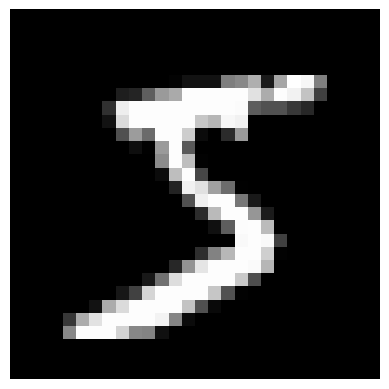

In [282]:
import matplotlib.pyplot as plt

img, label = train_dataset[0]
print(img)
print(img.shape)
print(label)

plt.figure()
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

In [283]:
batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [300]:
class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()
        # input matrix img 28 height x28 witdth x1 channel;
        #################################
        # 5x5 kernel+2padding:28x28x6
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        #Sigmoid(x)=σ(x)=1/( 1+exp(−x) )
        #
        self.sigmoid1 = nn.Sigmoid()
        #self.sigmoid1 = nn.ReLU()
        #2x2 kernel+2 stride:14x14x6
        # Max pool 1
        #AvgPool2d
        self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        #self.maxpool1 = nn.AvgPool2d(kernel_size=2,stride=2)
        # 5x5 kernel+no  padding:10x10x16
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.sigmoid2 = nn.Sigmoid()
        #self.sigmoid2 = nn.ReLU()
        # 2x2 kernel+2 stride:5x5x6
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)
        #self.maxpool2 = nn.AvgPool2d(kernel_size=2,stride=2)
        # Fully connected 1 (readout)
        #################################
        # flatten 16 output channel of 5x5 img, to 120 nuerons
        #self.fc1 = nn.Linear(16 * 5 * 5, 10) 
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        #self.fc1 = nn.Linear(16 * 5 * 5, 5*5) 
        self.fc1 = nn.Linear(16 * 5 * 5, 120) 
        #self.fc1 = nn.Linear(16 * 5 * 5, 16 * 5 * 5) 
        ##############################################################################################
        #DENSE
        # USE FNN        
        #self.hidden_layer1 = torch.nn.Linear(120, 120)
        #self.hidden_layer2 = torch.nn.Linear(120, 84)
        #self.output_layer  = torch.nn.Linear(84, 10)
        self.sig3 = nn.Sigmoid()
        #self.sig3 = nn.ReLU()
        self.fc2 = nn.Linear(120,84)
        self.sig4 = nn.Sigmoid()
        #self.sig4 = nn.ReLU()
        self.fc3 = nn.Linear(84,10)
    def forward(self, x):
        # input: x, size (num_img, 28, 28)
        # Convolution 1
        # O = (28 - 5 + 2*2)/ 1 + 1 = 28
        # output: size (num_img, 16, 28, 28)
        out = self.cnn1(x)
        out = self.sigmoid1(out)
        # Max pool 1
        # O = 28 / 2 = 14
        # output: size (num_img, 16, 14, 14)
        out = self.maxpool1(out)
        # Convolution 2
        # O = (14 - 5 + 2*2)/ 1 + 1 = 14
        # output: size (num_img, 32, 14, 14)
        out = self.cnn2(out)
        out = self.sigmoid2(out)
        # Max pool 2
        # O = 14 / 2 = 7
        # output: size (num_img, 32, 7, 7)
        out = self.maxpool2(out)
        # Resize
        # Original size: (num_img, 32, 7, 7)
        # out.size(0): num_img
        # New out size: (num_img, 32*7*7)
        out = out.view(out.size(0), -1)
        # Linear function (readout)
        # output: size (num_img, 10)
        out = self.fc1(out)
        #return out
        # input layer
        z = out
#################### FNN PART
        # hidden layer 1
        # z = W_1 * z + b_1
        # torch.nn.Linear(16 * 5 * 5, 120)
        # W_1: 
        # b_1: 
        #z = self.hidden_layer1(z)
        # z = ReLU(z)
        #z = torch.sigmoid(z)
        #z = torch.tanh(z)
        out = self.sig3(out)
        out = self.fc2(out)
        # hidden layer 2
        # z = W_2 * z + b_2
        #torch.nn.Linear(120, 84)
        # W_2: 
        # b_2:         
        #z = self.hidden_layer2(z)
        # z = ReLU(z)
        #z = torch.sigmoid(z)
        #z = torch.tanh(z)
        out = self.sig4(out)
        # output layer
        # z = W_3 * z + b_3
        #torch.nn.Linear(84, 10)
        # W_3: 
        # b_3: 
        #z = self.output_layer(z)      
        # z: 1
        out = self.fc3(out)
        
        return out

      

In [301]:
model2 = CNNModel2()

In [302]:
criterion = nn.CrossEntropyLoss()

In [303]:
learning_rate = 0.01
#learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [304]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        # Forward pass to get output/logits
        outputs = model2(images)
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        # Getting gradients w.r.t. parameters
        loss.backward()
        # Updating parameters
        optimizer.step()
        iter += 1
        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()
                # Forward pass only to get logits/output
                outputs = model2(images)
                #print(outputs.size())
                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)
                # Total number of labels
                total += labels.size(0)
                # Total correct predictions
                correct += (predicted == labels).sum()
            accuracy = 100 * correct / total
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3352553844451904. Accuracy: 11.350000381469727
Iteration: 1000. Loss: 2.3009026050567627. Accuracy: 11.350000381469727
Iteration: 1500. Loss: 2.332962989807129. Accuracy: 11.350000381469727
Iteration: 2000. Loss: 2.326007604598999. Accuracy: 11.350000381469727
Iteration: 2500. Loss: 2.315483331680298. Accuracy: 11.350000381469727
Iteration: 3000. Loss: 2.3221731185913086. Accuracy: 11.350000381469727


### SPARE/Unecssary CODE at Bottom

 The code for this assignment looks ok to me but I also feel like i did something wrong.

In [3]:
"""
output_size_end = 10
        
        # number of layers
        num_layers = 3
        
        # number of neurons in the hidden layers
        # first layer
        hidden_size1 = 120
        #second
        hidden_size2 = 84
        #
        hidden_size3 = 10
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size1)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size1, hidden_size2) for i in range(1, 3-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size3, output_size_end))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}
        self.act_func = self.act_list[self.activiation]

"""

"\noutput_size_end = 10\n        \n        # number of layers\n        num_layers = 3\n        \n        # number of neurons in the hidden layers\n        # first layer\n        hidden_size1 = 120\n        #second\n        hidden_size2 = 84\n        #\n        hidden_size3 = 10\n        \n        # activation functions\n        self.activiation = activiation\n        \n        # first hidden layer\n        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size1)])\n        # hidden layers inside the neural network\n        self.layers.extend([torch.nn.Linear(hidden_size1, hidden_size2) for i in range(1, 3-1)])\n        # output layer\n        self.layers.append(torch.nn.Linear(hidden_size3, output_size_end))\n        \n        # activation function list: relu, tanh\n        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh()}\n        self.act_func = self.act_list[self.activiation]\n\n"

In [45]:
# feedforward neural network with 2 hidden layers
####MOVE AWAY LATER
class FNNTwoHiddenLayerSig(torch.nn.Module):
    
    def __init__(self):
        super(FNNTwoHiddenLayerSig, self).__init__()    
        
        self.hidden_layer1 = torch.nn.Linear(120, 120)
        self.hidden_layer2 = torch.nn.Linear(84, 84)
        self.output_layer  = torch.nn.Linear(84, 10)
                    
    def forward(self, x):
        
        # input layer
        z = x
        
        # hidden layer 1
        # z = W_1 * z + b_1
        # W_1: 10 * 1
        # b_1: 10 * 1
        z = self.hidden_layer1(z)
        # z = ReLU(z)
        z = torch.sigmoid(z)

        # hidden layer 2
        # z = W_2 * z + b_2
        # W_2: 10 * 10
        # b_2: 10 * 1        
        z = self.hidden_layer2(z)
        # z = ReLU(z)
        z = torch.sigmoid(z)
        
        # output layer
        # z = W_3 * z + b_3
        # W_3: 1 * 10
        # b_3: 1
        z = self.output_layer(z)
        
        # z: 1
        return z

In [110]:
import torch
import time

# feedforward neural network with arbitrary number of layers
class FNN(torch.nn.Module):
    
    def __init__(self, input_size, output_size, num_layers, hidden_size, activiation):
        super(FNN, self).__init__()
        
        # dimension of the input data: x
        self.input_size = input_size
        
        # dimension of the output data: y
        self.output_size = output_size
        
        # number of layers
        self.num_layers = num_layers
        
        # number of neurons in the hidden layers
        self.hidden_size = hidden_size
        
        # activation functions
        self.activiation = activiation
        
        # first hidden layer
        self.layers = torch.nn.ModuleList([torch.nn.Linear(input_size, hidden_size)])
        # hidden layers inside the neural network
        self.layers.extend([torch.nn.Linear(hidden_size, hidden_size) for i in range(1, self.num_layers-1)])
        # output layer
        self.layers.append(torch.nn.Linear(hidden_size, output_size))
        
        # activation function list: relu, tanh
        self.act_list = {'relu': torch.nn.ReLU(), 'tanh': torch.nn.Tanh(),'sig':torch.nn.Sigmoid()}
        self.act_func = self.act_list[self.activiation]
    
    def forward(self, x):
        
        # input layer
        z = x
        
        for i in range(self.num_layers):
            
            if i < (self.num_layers-1):
                # hidden layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                # nonlinear layer: z = sigma(z)
                z = self.act_func(z)
            
            else:
                # output layer
                # linear layer: z = W_i * z + b_i
                z = self.layers[i](z)
                
        return z

In [199]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()

        #input matrix img 28 height x28 witdth x1 channel;
        #################################
        #5x5 kernel+2padding:28x28x6
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        #Sigmoid(x)=σ(x)=1/( 1+exp(−x) )
        #
        self.sigmoid1 = nn.Sigmoid()

        #2x2 kernel+2 stride:14x14x6
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        
        #5x5 kernel+no  padding:10x10x16
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.sigmoid2 = nn.Sigmoid()

        #2x2 kernel+2 stride:5x5x6
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2,stride=2)

        # Fully connected 1 (readout)
        #################################
        # flatten 16 output channel of 5x5 img, to 120 nuerons
        
        #self.fc1 = nn.Linear(16 * 5 * 5, 10) 
        ##self.fc1 = nn.Linear(16 * 5 * 5, 5*5) 
        #self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc1 = nn.Linear(16 * 5 * 5, 16 * 5 * 5) 
        ##############################################################################################
        #DENSE
        # USE FNN        
        
    def forward(self, x):
        
        # input: x, size (num_img, 28, 28)
        
        # Convolution 1
        # O = (28 - 5 + 2*2)/ 1 + 1 = 28
        # output: size (num_img, 16, 28, 28)
        out = self.cnn1(x)
        out = self.sigmoid1(out)

        # Max pool 1
        # O = 28 / 2 = 14
        # output: size (num_img, 16, 14, 14)
        out = self.maxpool1(out)

        # Convolution 2
        # O = (14 - 5 + 2*2)/ 1 + 1 = 14
        # output: size (num_img, 32, 14, 14)
        out = self.cnn2(out)
        out = self.sigmoid2(out)

        # Max pool 2
        # O = 14 / 2 = 7
        # output: size (num_img, 32, 7, 7)
        out = self.maxpool2(out)

        # Resize
        # Original size: (num_img, 32, 7, 7)
        # out.size(0): num_img
        # New out size: (num_img, 32*7*7)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        # output: size (num_img, 10)
        out = self.fc1(out)
        
        
        

        return out

In [257]:
#
model = CNNModel()
#fcn1 = FNN(input_size=10, output_size=120, num_layers=1, hidden_size=120, activiation='sig')
#fcn1 = FNN(input_size=120, output_size=120, num_layers=1, hidden_size=120, activiation='sig')
fcn1 = FNN(input_size=16 * 5 * 5, output_size=120, num_layers=1, hidden_size=120, activiation='sig')
fcn2 = FNN(input_size=120, output_size=84, num_layers=1, hidden_size=84, activiation='sig')
fcn3 = FNN(input_size=84, output_size=10, num_layers=1, hidden_size=10, activiation='sig')
#fnn2 = FNNTwoHiddenLayerSig()

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [255]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images
        images = images.requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        #outputs = model(images)
        outputs = model2(images)
        
        # Forward pass only to get logits/output
        #print("conv")
        #print(outputs.size())
        
        #do FNN dense 120 layer
        #outputs = fnn2(outputs)
        #outputs = fcn1(outputs)
        #print("fnn1")
        #print(outputs.size())
        # 84
        #outputs = fcn2(outputs)
        #print("fnn2")
        #print(outputs.size())
        #10
        #outputs = fcn3(outputs)
        #print("fnn3")
        #print(outputs.size())

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images
                images = images.requires_grad_()

                # Forward pass only to get logits/output
                #outputs = model(images)
                outputs = model2(images)
                #print("conv")
                #print(outputs.size())
                
                #do FNN dense 120 layer
                
                #outputs = fnn2(outputs)
                #outputs = fcn1(outputs)
                #print("fnn1")
                #print(outputs.size())
                # 84
                #outputs = fcn2(outputs)
                #print("fnn2")
                #print(outputs.size())
                #10
                #outputs = fcn3(outputs)
                #print("fnn3")
                #print(outputs.size())

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 2.3153538703918457. Accuracy: 9.819999694824219
Iteration: 1000. Loss: 2.326113224029541. Accuracy: 9.819999694824219
Iteration: 1500. Loss: 2.357224702835083. Accuracy: 9.819999694824219
Iteration: 2000. Loss: 2.383333206176758. Accuracy: 9.819999694824219
Iteration: 2500. Loss: 2.4442083835601807. Accuracy: 9.819999694824219
Iteration: 3000. Loss: 2.3877065181732178. Accuracy: 9.819999694824219
